# Memory Information

In [ ]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 25.51GB
Available: 24.59GB
Used: 592.92MB
Percentage: 3.6%


# GPU Information

In [ ]:
! nvidia-smi

Wed Nov 11 14:43:12 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
import numpy as np

from os import path


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
!unzip \*.zip

Archive:  Brand Data.zip
   creating: Brand Data/
   creating: Brand Data/Test/
   creating: Brand Data/Test/andina/
  inflating: Brand Data/Test/andina/107376607_1953994374736766_3416199187258470944_o.jpg  
  inflating: Brand Data/Test/andina/117259801_10224026866561492_5455844690393520490_o.jpg  
  inflating: Brand Data/Test/andina/117445423_10224026866521491_5373964668227438247_o (2).jpg  
  inflating: Brand Data/Test/andina/119118702_2018213311648205_387861045410207588_n (2).jpg  
  inflating: Brand Data/Test/andina/119118702_2018213311648205_387861045410207588_n (4).jpg  
  inflating: Brand Data/Test/andina/44885810_142247383414555_7914106956337599701_n.jpg  
  inflating: Brand Data/Test/andina/55542015_282230312676883_4836087687297368064_o.jpg  
  inflating: Brand Data/Test/andina/59289037_561985267658372_3705531391357390839_n.jpg  
  inflating: Brand Data/Test/andina/61532754_118567622688149_5577786491586740224_n.jpg  
  inflating: Brand Data/Test/andina/67403067_337824720504891

In [ ]:
#borrar imgs corruptas (reemplazar Test por Train o viceversa)


import os
import tensorflow as tf


num_skipped = 0
for folder_name in ( "lider","raid","andina","colun","huasil","eveready","duracell","nestle","coca-cola","pepsi","soprole","watts","axe","ballerina","becker","bresler","chamonix","dos caballos","energizer","escudo","glade","quix"):
    folder_path = os.path.join("Brand Data/Train", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 94 images


In [ ]:
# preprocesamiento de imgs

datagen_tr = ImageDataGenerator( rescale = 1./255,validation_split=0.19,width_shift_range=[-200,200],height_shift_range=0.5,rotation_range=60)

#datagen_tr = ImageDataGenerator( rescale = 1./255,validation_split=0.19,width_shift_range=[-200,200],height_shift_range=0.5)
datagen_ts = ImageDataGenerator( rescale = 1./255)

data_tr = datagen_tr.flow_from_directory('Brand Data/Train', target_size = (370, 370), batch_size = 32,class_mode = 'categorical',subset='training',seed=1)

data_val = datagen_tr.flow_from_directory('Brand Data/Train', target_size = (370, 370), batch_size = 32,class_mode = 'categorical',subset='validation',seed=1)

data_train = datagen_ts.flow_from_directory('Brand Data/Train', target_size = (370, 370), batch_size = 32, shuffle=False, class_mode = "categorical")

Found 3352 images belonging to 22 classes.
Found 773 images belonging to 22 classes.
Found 4125 images belonging to 22 classes.


In [ ]:
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense

#optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)
from keras.applications.xception import Xception

#usar resnet18


base_model=Xception(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(200,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(50,activation='relu')(x) #dense layer 2
preds=Dense(22,activation='softmax')(x) #final layer with softmax activation

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
from keras.models import Model

model = Model(inputs=base_model.input, outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

adam = tf.keras.optimizers.Adam(lr=0.0001)

# compile the model (should be done *after* setting layers to non-trainable)
#model.compile(optimizer="adam", loss=[categorical_focal_loss(alpha=[[.25, .25, .25, .25, .25,.25, .25, .25,.25, .25, .25,.25, .25,.25, .25, .25,.25, .25, .25,.25]], gamma=2)])
model.compile(optimizer="adam", loss="categorical_crossentropy")


history = model.fit(data_tr, steps_per_epoch = 104, verbose=True,epochs = 5, validation_data = data_val, validation_steps = 24)

Epoch 1/5
104/104 [==============================] - 216s 2s/step - loss: 2.6784 - val_loss: 2.4984
Epoch 2/5
104/104 [==============================] - 214s 2s/step - loss: 2.1204 - val_loss: 2.1305
Epoch 3/5
104/104 [==============================] - 213s 2s/step - loss: 1.8236 - val_loss: 1.9513
Epoch 4/5
104/104 [==============================] - 208s 2s/step - loss: 1.6544 - val_loss: 1.9234
Epoch 5/5
104/104 [==============================] - 209s 2s/step - loss: 1.5591 - val_loss: 1.9541


In [ ]:
from keras.optimizers import SGD

for layer in model.layers[:129]:
    layer.trainable=False
for layer in model.layers[129:]:
    layer.trainable=True

#model.save_weights(initial_weights)

import keras
from keras import backend as K
import tensorflow as tf


gamma = 2.0
alpha = 0.25

def categorical_focal_loss(alpha, gamma=2.):
    """
    Softmax version of focal loss.
    When there is a skew between different categories/labels in your data set, you can try to apply this function as a
    loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy. Alpha is used to specify the weight of different
      categories/labels, the size of the array needs to be consistent with the number of classes.
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=[[.25, .25, .25]], gamma=2)], metrics=["accuracy"], optimizer=adam)
    """

    alpha = np.array(alpha, dtype=np.float32)

    def categorical_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """

        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        return K.mean(K.sum(loss, axis=-1))

    return categorical_focal_loss_fixed



# Compile our model
adam = tf.keras.optimizers.Adam(lr=0.0001)
#model.compile(loss=[categorical_focal_loss(alpha=[[.25, .25,.25, .25, .25,.25, .25, .25,.25, .25, .25,.25, .25,.25, .25, .25,.25, .25, .25,.25]], gamma=2)], metrics=["accuracy"], optimizer="adam") 

#model.compile(optimizer = "rmsprop", loss="categorical_crossentropy", metrics = ['accuracy'])

model.compile(optimizer =adam, loss="categorical_crossentropy", metrics = ['accuracy'])

In [ ]:

for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_2
1 conv2d_4
2 batch_normalization_4
3 activation
4 conv2d_5
5 batch_normalization_5
6 activation_1
7 conv2d_6
8 batch_normalization_6
9 activation_2
10 max_pooling2d
11 conv2d_7
12 batch_normalization_7
13 activation_3
14 conv2d_8
15 batch_normalization_8
16 activation_4
17 max_pooling2d_1
18 conv2d_12
19 batch_normalization_12
20 activation_8
21 conv2d_10
22 conv2d_13
23 batch_normalization_10
24 batch_normalization_13
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_9
29 conv2d_11
30 conv2d_14
31 conv2d_15
32 batch_normalization_9
33 batch_normalization_11
34 batch_normalization_14
35 batch_normalization_15
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed_5b
41 conv2d_19
42 batch_normalization_19
43 activation_15
44 conv2d_17
45 conv2d_20
46 batch_normalization_17
47 batch_normalization_20
48 activation_13
49 activation_16
50 conv2d_16
51 conv2d_18
52 conv2d_21
53 batch_normalization_16
54 batch_normalization_18
55 batch_normalization_

In [ ]:
history = model.fit(data_tr, steps_per_epoch = 102, verbose=True,epochs = 25, validation_data = data_val, validation_steps = 24)

Epoch 1/25
102/102 [==============================] - 208s 2s/step - loss: 1.3990 - accuracy: 0.5756 - val_loss: 1.7535 - val_accuracy: 0.5065
Epoch 2/25
102/102 [==============================] - 207s 2s/step - loss: 1.2784 - accuracy: 0.6109 - val_loss: 1.6966 - val_accuracy: 0.5182
Epoch 3/25
102/102 [==============================] - 208s 2s/step - loss: 1.2157 - accuracy: 0.6290 - val_loss: 1.6769 - val_accuracy: 0.5052
Epoch 4/25
102/102 [==============================] - 207s 2s/step - loss: 1.1999 - accuracy: 0.6400 - val_loss: 1.5802 - val_accuracy: 0.5456
Epoch 5/25
102/102 [==============================] - 207s 2s/step - loss: 1.1317 - accuracy: 0.6720 - val_loss: 1.5117 - val_accuracy: 0.5508
Epoch 6/25
102/102 [==============================] - 206s 2s/step - loss: 1.0928 - accuracy: 0.6778 - val_loss: 1.5540 - val_accuracy: 0.5378
Epoch 7/25
102/102 [==============================] - 207s 2s/step - loss: 1.0342 - accuracy: 0.6858 - val_loss: 1.4714 - val_accuracy: 0.5911

Text(0.5, 1.0, 'Accuracy Curves (brand classifer)')

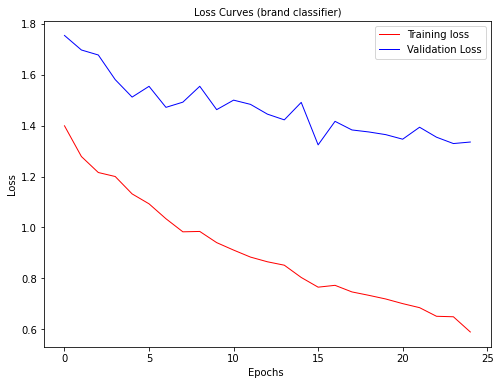

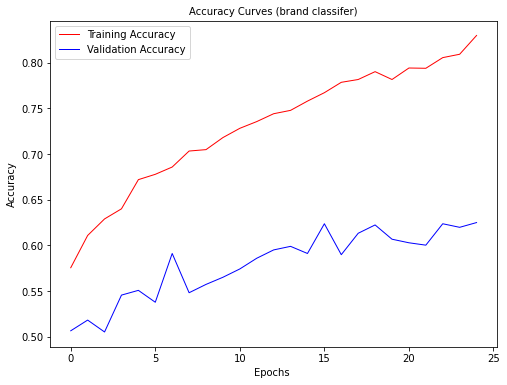

In [ ]:
#Gráfico de loss del modelo 1 (comparación de conjunto de validación con el de entrenamiento)
import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves (brand classifier)',fontsize=10)


#Gráfico de accuracy del modelo 1 (comparación de conjunto de validación con el de entrenamiento)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=1.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Curves (brand classifer)',fontsize=10)

In [ ]:
 from sklearn.metrics import accuracy_score
Y_pred = model.predict(data_ts)
y_pred =np.argmax(Y_pred, axis=1)

print("Acc score: ",accuracy_score(data_ts.classes,y_pred))


Acc score:  0.7506631299734748


Text(0.5, 15.0, 'Predicted label')

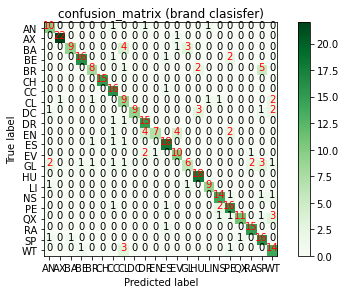

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_mtx = confusion_matrix(data_ts.classes,y_pred) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('confusion_matrix (brand clasisfer)',color="black")
plt.colorbar()
tick_marks = np.arange(22)
plt.xticks(tick_marks, ['AN',"AX","BA","BE","BR","CH",'CC','CL',"DC",'DR',"EN","ES","EV","GL","HU","LI",'NS','PE',"QX","RA",'SP','WT'],color="black")
plt.yticks(tick_marks, ['AN',"AX","BA","BE","BR","CH",'CC','CL',"DC",'DR',"EN","ES","EV","GL","HU","LI",'NS','PE',"QX","RA",'SP','WT'],color="black")
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 22.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="red" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label',color="black")
plt.xlabel('Predicted label',color="black")

In [ ]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("Brand_NASNetLargetS2V1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Brand_NASNetLargeS2V1.hdf5")
print("Saved model to disk")

#model.save("From_scratchV1.h5")

Saved model to disk


In [ ]:
!python --version
from keras.models import model_from_json
import tensorflow as tf


Python 3.6.9


In [ ]:
json_file = open('/content/Brand_InceptionResNetnetV2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)





In [ ]:
loaded_model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7f14f74c2fd0>>

In [ ]:
loaded_model

In [ ]:
model_json = loaded_model.to_json()
with open("Brand_NASNetLargetV2.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
#modelo externo de paper

# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

class LeNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model
		model = Sequential()
		inputShape = (height, width, depth)

		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)

		# first set of CONV => RELU => POOL layers
		model.add(Conv2D(20, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# second set of CONV => RELU => POOL layers
		model.add(Conv2D(50, (5, 5), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

In [ ]:
opt = SGD(lr=0.005)
model = LeNet.build(width=256, height=256, depth=3, classes=20)

model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [ ]:
history = model.fit(data_tr, steps_per_epoch = 97, verbose=True,epochs = 100, validation_data = data_val, validation_steps = 22)

Epoch 1/100
97/97 [==============================] - 109s 1s/step - loss: 2.9820 - accuracy: 0.0749 - val_loss: 2.9640 - val_accuracy: 0.0866
Epoch 2/100
97/97 [==============================] - 107s 1s/step - loss: 2.9523 - accuracy: 0.0928 - val_loss: 2.9271 - val_accuracy: 0.1051
Epoch 3/100
97/97 [==============================] - 108s 1s/step - loss: 2.9151 - accuracy: 0.1009 - val_loss: 2.9029 - val_accuracy: 0.1065
Epoch 4/100
97/97 [==============================] - 108s 1s/step - loss: 2.8976 - accuracy: 0.1087 - val_loss: 2.8893 - val_accuracy: 0.1165
Epoch 5/100
97/97 [==============================] - 108s 1s/step - loss: 2.8790 - accuracy: 0.1139 - val_loss: 2.9192 - val_accuracy: 0.0909
Epoch 6/100
97/97 [==============================] - 108s 1s/step - loss: 2.8757 - accuracy: 0.1074 - val_loss: 2.8707 - val_accuracy: 0.1051
Epoch 7/100
97/97 [==============================] - 108s 1s/step - loss: 2.8558 - accuracy: 0.1194 - val_loss: 2.8724 - val_accuracy: 0.1108
Epoch 

KeyboardInterrupt: ignored

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import base64
import numpy as np
import io
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from keras.models import load_model, model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from flask import request
from flask import jsonify
from flask import Flask
import cv2
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import Model




def load_json(model_json, model_weight):
    json_file = open(model_json, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(model_weight)

    return loaded_model

def load_models(model_trashnet, model_trashnet_weight):
    

    model_for_trashnet = load_json(model_trashnet, model_trashnet_weight)

    return model_for_trashnet


model_brand_recognition = "Brand_XceptionS2-75.json"
model_brand_recognition_weight = 'Brand_XceptionS2-75.hdf5'




#load models
model_for_brand_recognition = load_models( model_brand_recognition,model_brand_recognition_weight)

print('model loaded')


model loaded


In [ ]:
 from sklearn.metrics import accuracy_score
Y_pred = model_for_brand_recognition.predict(data_train)
y_pred =np.argmax(Y_pred, axis=1)

print("Acc score brand recognition (train): ",accuracy_score(data_train.classes,y_pred))

Acc score brand recognition (train):  0.8368484848484848


Text(0.5, 15.0, 'Predicted label')

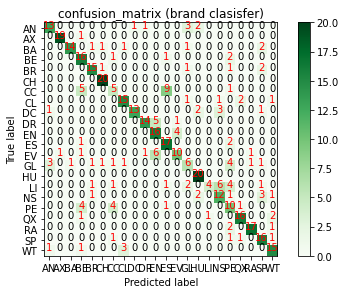

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(data_ts.classes,y_pred) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('confusion_matrix (brand clasisfer)',color="black")
plt.colorbar()
tick_marks = np.arange(22)
plt.xticks(tick_marks, ['AN',"AX","BA","BE","BR","CH",'CC','CL',"DC",'DR',"EN","ES","EV","GL","HU","LI",'NS','PE',"QX","RA",'SP','WT'],color="black")
plt.yticks(tick_marks, ['AN',"AX","BA","BE","BR","CH",'CC','CL',"DC",'DR',"EN","ES","EV","GL","HU","LI",'NS','PE',"QX","RA",'SP','WT'],color="black")
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 22.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="red" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label',color="black")
plt.xlabel('Predicted label',color="black")